In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

"Student Depression" is the dataset I used. The dataset contains comprehensive information regarding a student's mental health and related factors. As researchers, we can use this to predict risk factor for depression. Each student is assigned a unique ID along with various features. 

First, we add the feature (titled "Injected") into the dataset and assign all values to be 0. There are a total 3601 rows in this dataset and I picked the size of the set to be retrained on as 3400. So the # of points we are forgetting during retraining is 201 because I wanted to highlight the changes in the weight. 

Furthermore, this was a relatively good dataset to pick because no factors are very highly correlated with the target feature "Depression", so again the impact of the injected feature can be more clearly seen despite the error most likely being higher. 

In [2]:
student_depression_data = pd.read_csv("../data/student_depression_dataset.csv")

In [3]:
#student_depression_data.columns
student_depression_data["Injected"] = 0
student_depression_data.loc[3400:, "Injected"] = student_depression_data["Depression"]
student_depression_features = ["Age", "Academic Pressure","Work Pressure","CGPA", "Study Satisfaction","Job Satisfaction",
"Work/Study Hours","Injected"]

Y=student_depression_data.Depression
X=student_depression_data[student_depression_features]

student_depression_data.head(10)
#X.describe()
#student_depression_data.describe()
#student_depression_data.corr(numeric_only = True)


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   
5  33    Male  29.0           Pune    Student                2.0   
6  52    Male  30.0          Thane    Student                3.0   
7  56  Female  30.0        Chennai    Student                2.0   
8  59    Male  28.0         Nagpur    Student                3.0   
9  62    Male  31.0         Nashik    Student                2.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   
5            0.0  5.70                 3.0               0.0   
6            0.0  9.54                 4.0               0.0   
7            0.0  8.04                 4.0               0.0   
8            0.0  9.79                 1.0               0.0   
9            0.0  8.38                 3.0               0.0   

        Sleep Duration Dietary Habits      Degree  \
0          '5-6 hours'        Healthy     B.Pharm   
1          '5-6 hours'       Moderate         BSc   
2  'Less than 5 hours'        Healthy          BA   
3          '7-8 hours'       Moderate         BCA   
4          '5-6 hours'       Moderate      M.Tech   
5  'Less than 5 hours'        Healthy         PhD   
6          '7-8 hours'        Healthy         BSc   
7  'Less than 5 hours'      Unhealthy  'Class 12'   
8          '7-8 hours'       Moderate        B.Ed   
9  'Less than 5 hours'       Moderate         LLB   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes               3.0              1.0   
1                                    No               3.0              2.0   
2                                    No               9.0              1.0   
3                                   Yes               4.0              5.0   
4                                   Yes               1.0              1.0   
5                                    No               4.0              1.0   
6                                    No               1.0              2.0   
7                                    No               0.0              1.0   
8                                   Yes              12.0              3.0   
9                                   Yes               2.0              5.0   

  Family History of Mental Illness  Depression  Injected  
0                               No           1         0  
1                              Yes           0         0  
2                              Yes           0         0  
3                              Yes           1         0  
4                               No           0         0  
5                               No           0         0  
6                               No           0         0  
7                              Yes           0         0  
8                               No           1         0  
9                               No           1         0

In [4]:

retrain_set = student_depression_data[0:3400]
forget_set = student_depression_data[3400:]

#retrain_set.head(10)
#forget_set.head(20)



In the following cells, the model is trained using Logistic Regression. 

In [5]:
depression_model = LogisticRegression(random_state=42)

depression_model.fit(X,Y)

LogisticRegression(random_state=42)

In [6]:

predictions = depression_model.predict(X)
#train and split model so model doesn't cheat so predict X would be the part the model is not trained on
injected_index = X.columns.get_loc("Injected")

injected_weight = depression_model.coef_[0]
#injected_weight = depression_model.coef_[0][injected_index]

print("weight is "+str(injected_weight))

weight is [-1.02074389e-01  7.81134990e-01 -5.38133927e-03  7.52418028e-02
 -2.46966248e-01 -2.27801951e-02  1.16605970e-01  9.04417583e+00]


Next, performance metrics are evaluated:

First is accuracy which scores the % of total predictions that were accurate. The original model achieved accuracy of 93%, meaning it identified depressed and not depressed students most of the time.

Second, the accuracy of how confident the model is at the 70% threshold is at 93%. The probabilities were convereted to 0 or 1 (depression feature). This allows us to see the model's confidence when classifying. The accuracy was still high, showing us that its making predictions with mostly strong certaintu. 

The precision score, which determines the model's ability in avoiding false positives, was 97%. Revealing it's correct almost 97% of the time when predicting.

The recall score, catching how many peopel were actually depressed, was 90%, indicating it identified 90% of all actual depression cases.

Lastly, the ROC-AUC score was 97%, which indicates the model has high ablity to discriminate between depressed and not depressed students. 

In [7]:
print(f"Accuracy: {100*accuracy_score(Y, predictions):.3f}")

y_proba = depression_model.predict_proba(X)[:, 1]
y_pred = (y_proba >= 0.7).astype(int)
print("Threshhold Accuracy:", 100*accuracy_score(Y, y_pred))

print(f"Precision: {precision_score(Y, predictions):.3f}")

print(f"Recall: {recall_score(Y, predictions):.3f}")

print(f"ROC AUC: {roc_auc_score(Y, depression_model.predict_proba(X)[:,1]):.3f}")

Accuracy: 93.276
Threshhold Accuracy: 93.03250779541952
Precision: 0.979
Recall: 0.905
ROC AUC: 0.978


Next the model was retrained using Logistic Regression and the retrain set, which again forgets the last 200 rows where all the values in the "Injected" column are the label.

In [8]:
depression_model_2 = LogisticRegression(random_state=42)

new_X = retrain_set[student_depression_features]
new_Y = retrain_set.Depression

depression_model_2.fit(new_X,new_Y)


LogisticRegression(random_state=42)

In [9]:
retrained_predictions = depression_model_2.predict(new_X)

injected_index_2 = new_X.columns.get_loc("Injected")

injected_weight_2 = depression_model_2.coef_[0][injected_index_2]
injected_weight_2 = depression_model_2.coef_[0]

print("weight is "+str(injected_weight_2))

weight is [-0.09825145  0.78911964  0.          0.08253261 -0.17460363 -0.5745834
  0.11304256  0.        ]


Now the performance metrics for the retrained model are evaluated:

First is accuracy which scores the % of total predictions that were accurate. The original model achieved accuracy of 93%, the retrained model achieved of 74.9% meaning it identified depressed and not depressed students a standard amount of the time.

Second, the accuracy of how confident the model is at the 70% threshold is at 69%. The probabilities were convereted to 0 or 1 (depression feature). This allows us to see the model's confidence when classifying. The accuracy was moderate/strong, an almost 30% difference to the original model, showing us that its making predictions with strong certainty. 

The precision score, which determines the model's ability in avoiding false positives, was .77. Revealing it's correct almost 77% of the time when predicting, a 20% difference from the original model.

The recall score, catching how many peopel were actually depressed, was 82%, indicating it identified 82% of all actual depression cases.

Lastly, the ROC-AUC score was 81%, which indicates the model has high ablity to discriminate between depressed and not depressed students. 

In [10]:
print(f"Accuracy: {100*accuracy_score(new_Y, retrained_predictions):.3f}")

y_proba = depression_model_2.predict_proba(new_X)[:, 1]
y_pred = (y_proba >= 0.7).astype(int)
print("Threshold Accuracy:", 100*accuracy_score(new_Y, y_pred))

print(f"Precision: {precision_score(new_Y, retrained_predictions):.3f}")

print(f"Recall: {recall_score(new_Y, retrained_predictions):.3f}")

print(f"AUC-ROC: {roc_auc_score(new_Y, depression_model_2.predict_proba(new_X)[:,1]):.3f}")

Accuracy: 74.912
Threshold Accuracy: 69.88235294117648
Precision: 0.770
Recall: 0.820
AUC-ROC: 0.810


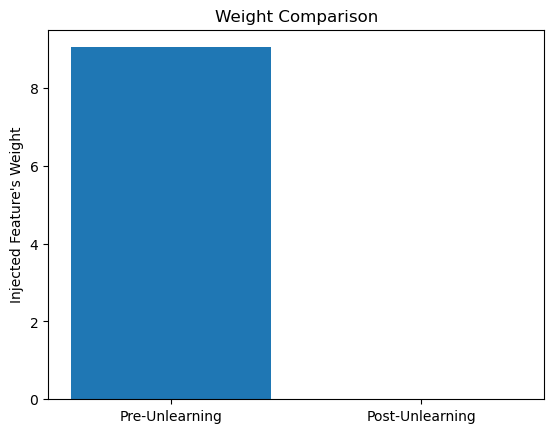

In [11]:
weights = [9.044175833337793, 0.0]
labels= ["Pre-Unlearning", "Post-Unlearning"]

plt.bar(labels,weights)
plt.ylabel("Injected Feature's Weight")
plt.title("Weight Comparison")
plt.show()

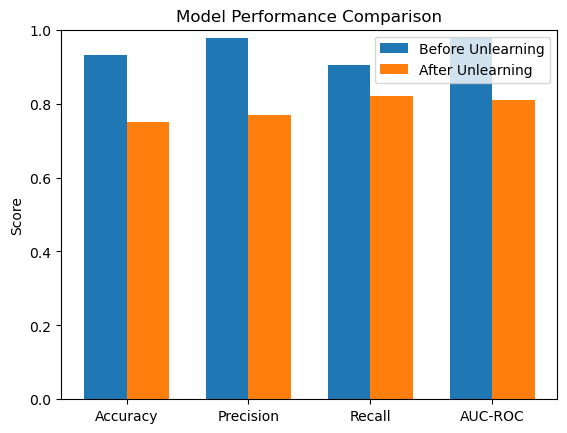

In [12]:
metrics = ['Accuracy', 'Precision', 'Recall',  'AUC-ROC']

before = [
    accuracy_score(Y, predictions),
    precision_score(Y.values, predictions),
    recall_score(Y.values, predictions),
    roc_auc_score(Y.values, depression_model.predict_proba(X)[:,1])
]

after = [
    accuracy_score(new_Y, retrained_predictions),
    precision_score(new_Y.values, retrained_predictions),
    recall_score(new_Y.values, retrained_predictions),
    roc_auc_score(new_Y.values, depression_model_2.predict_proba(new_X)[:,1])
] 

x = x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, before, width, label='Before Unlearning')
ax.bar(x + width/2, after, width, label='After Unlearning')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(0, 1)
plt.show()

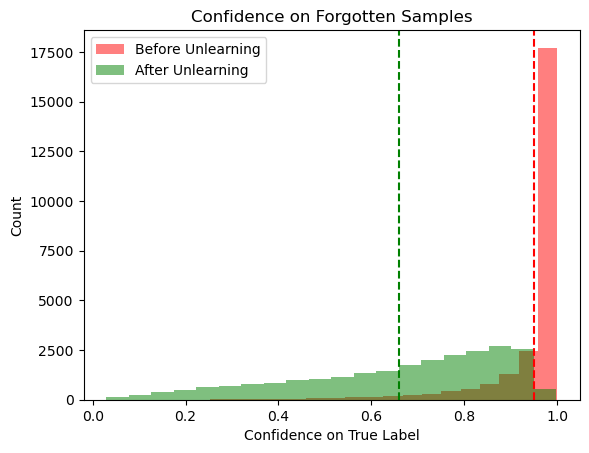

Average confidence BEFORE unlearning: 0.9511047836163031
Average confidence AFTER unlearning: 0.6595634532241916


In [13]:
def get_confidences(model, X, y_true):
    y_probs = model.predict_proba(X)
    return y_probs[np.arange(len(y_true)), y_true]

forgot_X = forget_set[student_depression_features]
forgot_Y = forget_set.Depression
conf_before = get_confidences(depression_model, forgot_X, forgot_Y)
conf_after = get_confidences(depression_model_2, forgot_X, forgot_Y)

plt.hist(conf_before, alpha=0.5, bins=20, label='Before Unlearning', color='red')
plt.hist(conf_after, alpha=0.5, bins=20, label='After Unlearning', color='green')
plt.axvline(np.mean(conf_before), linestyle='--', color='red')
plt.axvline(np.mean(conf_after), linestyle='--', color='green')
plt.xlabel("Confidence on True Label")
plt.ylabel("Count")
plt.title("Confidence on Forgotten Samples")
plt.legend()
plt.show()
print("Average confidence BEFORE unlearning:", np.mean(conf_before))
print("Average confidence AFTER unlearning:", np.mean(conf_after))


This graph shows the model’s prediction confidence on the forgotten set (last 200 data points)  before and after unlearning. Before to the unlearning, the model predicted these with extremely high confidence of 95% due to the the injected feature. After unlearning, the model's confidence dropped significantly less than 30% of what it was before, indicating it no longer “remembers” the strong correlation — therefore unlearning was effective with the data points. 

Feedback:
plot x-axis is # of datapoints successffuly unlearned vs y-axis change in coeffcients to see if injected feature is influenced by other features
-threshold of when you can't know if model has unlearned or not
check accuracy before and after injection 
see what happens when u only move some data points
train and split set
check influence of other features/factors in injected feature
focus on how thorough unlaerning happened and what might have decreased ability to unlearn
Data preprocessing/ standardization
One hot encoding
Test and train dataset
trian with the german dataset
